In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import os
import cv2

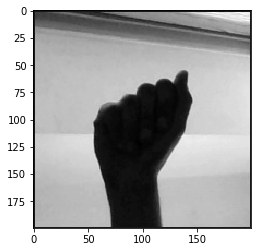

In [17]:
DATADIR = "/home/chirag/Downloads/Alphabets_datset/asl_alphabet_train"
CATEGORIES = ['A','B','C','D','del','E','F','G','H','I','J','K','L','M','N','nothing','O','P','Q','R','S','space','T','U','V','W','X','Y','Z']
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)                                    #path to petImages dir
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)   #path to each individual images  
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [18]:
print(img_array.shape) #curret shape of images

(200, 200)


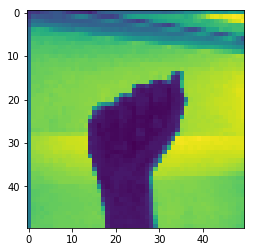

In [19]:
IMG_SIZE = 50  # resizing images

new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
plt.imshow(new_array)


In [20]:
training_data = []
IMG_SIZE = 50  # resizing images

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)  #path to petImages dir
        class_num = CATEGORIES.index(category) # index of classes
        for img in os.listdir(path):
            try:
                # img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)  #path to each individual images
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # reshaping into (50,50)
                training_data.append([new_array, class_num])             # appending to training_data list
            except Exception as e:
                pass
            
        
create_training_data()

In [21]:
new_array.shape

(50, 50)

In [22]:
print(len(training_data))

87000


In [23]:
import random 

random.shuffle(training_data)

In [24]:
for sample in training_data[:10]:
    print(sample[1])

26
1
16
23
0
0
25
19
5
2


In [25]:
X = []  # x_traininng data
y = []  # y label output data

In [26]:
for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # reshaping 50,50,1
X.shape

(87000, 50, 50, 1)

In [27]:
# to save model for further use
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()


pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()